### Вар №15: Виконати детекцію границь на зображеннях за допомогою операторів Kirsch,  Laplacian. Провести порівняльний аналіз. 

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
KL1 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])
KL2 = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])

KL3 = np.array([
    [2, -1, 2],
    [-1, -4, -1],
    [2, 1, 2]])
KL4 = np.array([
    [-1, 2, -1],
    [2, -4, 2],
    [-1, 2, -1]])

KIRSCH_KERNEL_LIST = [
    np.array([[5, 5, 5],
              [-3, 0, -3],
              [-3, -3, -3]]),

    np.array([[-3, 5, 5],
              [-3, 0, 5],
              [-3, -3, -3]]),

    np.array([[-3, -3, 5],
              [-3, 0, 5],
              [-3, -3, 5]]),

    np.array([[-3, -3, -3],
              [-3, 0, 5],
              [-3, 5, 5]]),

    np.array([[-3, -3, -3],
              [-3, 0, -3],
              [5, 5, 5]]),

    np.array([[-3, -3, -3],
              [5, 0, -3],
              [5, 5, -3]]),

    np.array([[5, -3, -3],
              [5, 0, -3],
              [5, -3, -3]]),

    np.array([[5, 5, -3],
              [5, 0, -3],
              [-3, -3, -3]]),
]


In [5]:
def rgb2gray(image):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b
    return gray


def get_img_with_pad(img, h, w, padding):
    img_with_pad = np.zeros((h + padding * 2, w + padding * 2), dtype=float)
    img_with_pad[padding: padding + h, padding: padding + w] = img.copy().astype(float)
    return img_with_pad


def get_origin_img(img_with_pad, h, w, padding):
    img_with_pad = np.clip(img_with_pad, 0, 255)
    return img_with_pad[padding: padding + h, padding: padding + w].astype(np.uint8)


def apply_operator_kernel(img, kernel):
    H, W = img.shape
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2

    img_with_pad = get_img_with_pad(img, H, W, padding)

    buffer = img_with_pad.copy()

    for y in range(H):
        for x in range(W):
            img_with_pad[padding + y, padding + x] = np.sum(kernel * (buffer[y: y + kernel_size, x: x + kernel_size]))

    return get_origin_img(img_with_pad, H, W, padding)


def laplacian_operator(img, kernel):
    return apply_operator_kernel(img, kernel)


def kirsch_operator(img, kernel):
    filtered_list = np.zeros((8, img.shape[0], img.shape[1]))

    for i, dim_kernel in enumerate(kernel):
        filtered_list[i] = apply_operator_kernel(img, dim_kernel)

    final = np.max(filtered_list, axis=0)
    final[np.where(final >= 255)] = 255
    final[np.where(final < 255)] = 0

    return final


def perform(filename):
    img = cv.imread(filename)
    plt.imshow(img, cmap='RdYlGn')
    plt.show()

    gray_img = rgb2gray(img)
    plt.imshow(gray_img, cmap='gray')
    plt.show()

    filtered_by_laplacian_img = laplacian_operator(gray_img, KL1)
    plt.imshow(filtered_by_laplacian_img, cmap='gray')
    plt.show()

    filtered_by_kirsch_img = kirsch_operator(gray_img, KIRSCH_KERNEL_LIST)
    plt.imshow(filtered_by_kirsch_img, cmap='gray')
    plt.show()

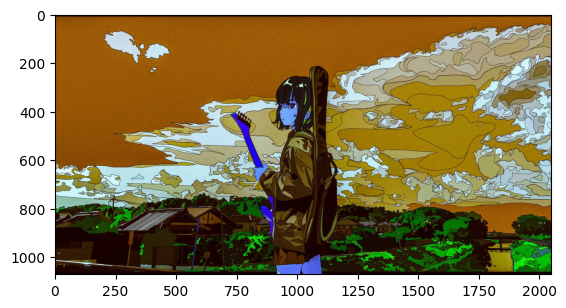

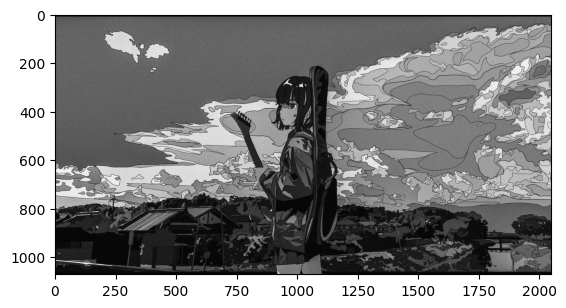

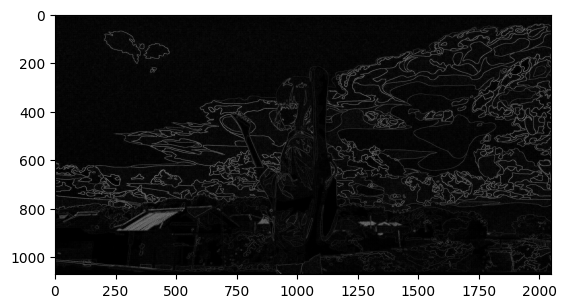

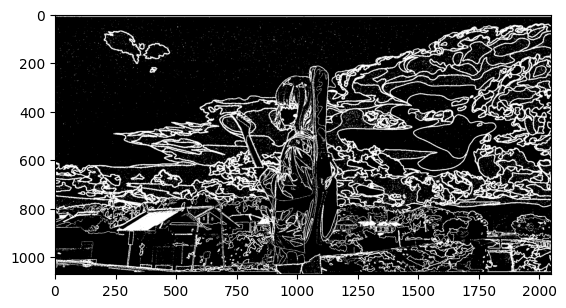

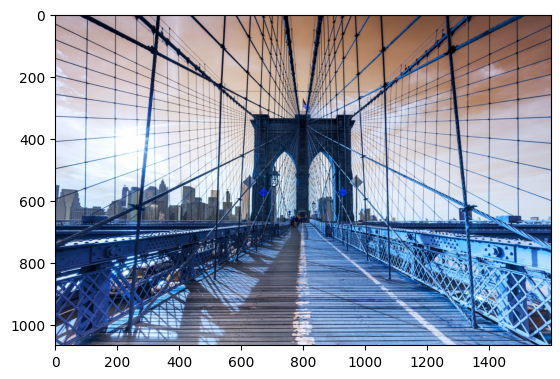

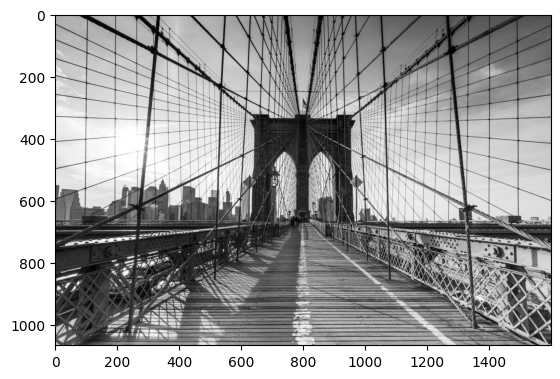

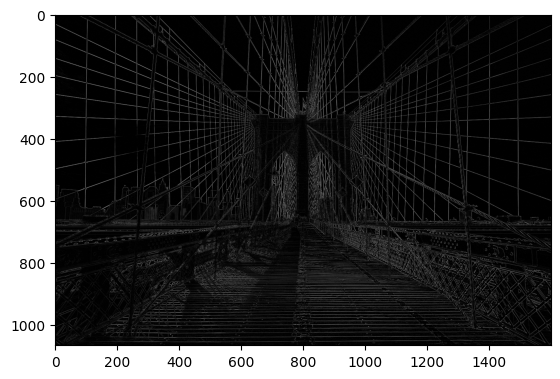

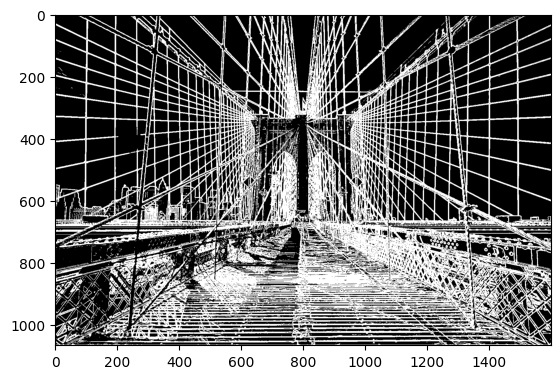

In [6]:
perform('D:\Labs\CV\cv-2023\group 412\lab1\Kostiv_Bohdan\images\image_1.jpg')
perform('D:\Labs\CV\cv-2023\group 412\lab1\Kostiv_Bohdan\images\image_2.jpg')

In [28]:
# Kirsch edge detection operator
def kirsch(image):
    m, n = image.size
    list = []
    kirsch = np.zeros((m, n))
    for i in range(2, m-1):
        for j in range(2, n-1):
            d1 = np.square(5 * image[i-1, j-1]+5 * image[i-1, j]+5 * image[i-1, j+1] -
                           3 * image[i, j-1]-3 * image[i, j+1]-3 * image[i+1, j-1] -
                           3 * image[i+1, j]-3 * image[i+1, j+1])
            d2 = np.square((-3) * image[i-1, j-1]+5 * image[i-1, j]+5 * image[i-1, j+1] -
                           3 * image[i, j-1]+5 * image[i, j+1]-3 * image[i+1, j-1] -
                           3 * image[i+1, j]-3 * image[i+1, j+1])
            d3 = np.square((-3) * image[i-1, j-1]-3 * image[i-1, j]+5 * image[i-1, j+1] -
                           3 * image[i, j-1]+5 * image[i, j+1]-3 * image[i+1, j-1] -
                           3 * image[i+1, j]+5 * image[i+1, j+1])
            d4 = np.square((-3) * image[i-1, j-1]-3 * image[i-1, j]-3 * image[i-1, j+1] -
                           3 * image[i, j-1]+5 * image[i, j+1]-3 * image[i+1, j-1] +
                           5 * image[i+1, j]+5 * image[i+1, j+1])
            d5 = np.square((-3) * image[i-1, j-1]-3 * image[i-1, j]-3 * image[i-1, j+1]-3
                           * image[i, j-1]-3 * image[i, j+1]+5 * image[i+1, j-1] +
                           5 * image[i+1, j]+5 * image[i+1, j+1])
            d6 = np.square((-3) * image[i-1, j-1]-3 * image[i-1, j]-3 * image[i-1, j+1] +
                           5 * image[i, j-1]-3 * image[i, j+1]+5 * image[i+1, j-1] +
                           5 * image[i+1, j]-3 * image[i+1, j+1])
            d7 = np.square(5 * image[i-1, j-1]-3 * image[i-1, j]-3 * image[i-1, j+1] +
                           5 * image[i, j-1]-3 * image[i, j+1]+5 * image[i+1, j-1] -
                           3 * image[i+1, j]-3 * image[i+1, j+1])
            d8 = np.square(5 * image[i-1, j-1]+5 * image[i-1, j]-3 * image[i-1, j+1] +
                           5 * image[i, j-1]-3 * image[i, j+1]-3 * image[i+1, j-1] -
                           3 * image[i+1, j]-3 * image[i+1, j+1])
# Take the maximum value in each direction, the effect is not good, use another method
    list = [d1, d2, d3, d4, d5, d6, d7, d8]
    kirsch[i, j] = int(np.sqrt(max(list)))
    # : Rounding the die length in all directions
    # kirsch[i, j] =int(np.sqrt(d1+d2+d3+d4+d5+d6+d7+d8))
    for i in range(m):
        for j in range(n):
            if kirsch[i, j] > 127:
                kirsch[i, j] = 255
            else:
                kirsch[i, j] = 0
    return kirsch
